In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_recall_fscore_support, accuracy_score, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

In [2]:
# Loading the data
data_path = 'Trifork Machine Learning Assignment--dataAmazonReviews.csv'
df = pd.read_csv(data_path)

In [11]:
# Preprocessing the data
df = df.drop_duplicates()
df = df[pd.notnull(df['Title'])]
df = df[pd.notnull(df['Review'])]

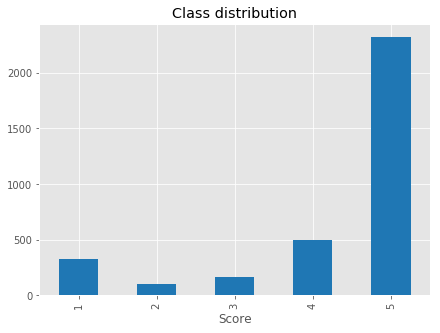

In [12]:
# Plot class distribution
df.groupby('Score').Review.count().plot.bar(figsize=(7,5), title='Class distribution', colormap='tab20')
plt.show()

In [26]:
def train(classifier, data, name, feature_names):
    X_train, X_test, y_train, y_test = data
    # Train the model
    classifier.fit(X_train, y_train)
    # Predict the test data
    y_pred = classifier.predict(X_test)
    print(name)
    # Compute accuracy
    print("Accuracy: %s" % accuracy_score(y_test, y_pred, normalize=True, sample_weight=None))
    # Compute f1, precision and recall
    p, r, f, _ = precision_recall_fscore_support(y_test, y_pred)
    print("Precision: {} \nRecall: {} \nFscore {}".format(p, r, f))
    # Print the 10 top keywords    
    target_names = ['1', '2', '3', '4', '5']
    print("top 10 keywords per class:")
    for i, label in enumerate(target_names):
        top10 = np.argsort(classifier.coef_[i])[-10:]
        #print(top10)
        #print(feature_names[top10])
        print("%s: %s" % (label, " ".join(feature_names[i] for i in top10)))
    print('\nConfusion matrix')
    cm = confusion_matrix(y_test, y_pred)
    print(cm)

    

In [13]:
# Divide data set and prepare features
X_train, X_test, y_train, y_test = train_test_split(df['Review'], df['Score'], test_size=0.2, random_state = 0)
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1, 2), min_df=2, stop_words='english', norm='l2', sublinear_tf=True)
X_train = tfidf_vectorizer.fit_transform(X_train)
X_test = tfidf_vectorizer.transform(X_test)  # use same vectorizer for the test data
data = [X_train, X_test, y_train, y_test]
feature_names = tfidf_vectorizer.get_feature_names()

In [16]:
X_train.shape

(2733, 7492)

In [29]:
classifier = MultinomialNB(alpha=0.01)
train(classifier, data, 'Naive Bayes', feature_names)

Naive Bayes
Accuracy: 0.72953216374269
Precision: [0.68055556 0.5        0.4        0.28571429 0.76083189] 
Recall: [0.72058824 0.0625     0.05714286 0.07476636 0.95851528] 
Fscore [0.7        0.11111111 0.1        0.11851852 0.84830918]
top 10 keywords per class:
1: card refund money item don order account service customer amazon
2: orders days price customer time ordered shipping order item amazon
3: time items service order products like delivery shipping good amazon
4: buy site fast products prices delivery great service amazon good
5: time customer best fast delivery love good great service amazon

Confusion matrix
[[ 49   1   2   3  13]
 [  8   1   0   1   6]
 [  4   0   2   3  26]
 [  5   0   1   8  93]
 [  6   0   0  13 439]]


In [30]:
classifier = LinearSVC(penalty='l2', dual=False, tol=1e-4)
train(classifier, data, 'Linear SVC', feature_names)

Linear SVC
Accuracy: 0.7324561403508771
Precision: [0.73333333 0.5        0.28571429 0.33333333 0.76338515] 
Recall: [0.64705882 0.0625     0.05714286 0.11214953 0.9650655 ] 
Fscore [0.6875     0.11111111 0.0952381  0.16783217 0.85245902]
top 10 keywords per class:
1: august doing account mom review refused horrible trying contact poor
2: expect order cancelled stuffed net struggling involved finally cancel lot better amazon price
3: product damaged card details products reviews poor service prefer good amazon fake helpline amazon useful slow
4: delivery prices dates bit amazon days shop products trustful product good design normally overall
5: delivery quality earlier amazing awesome love fantastic recommend live thank excellent

Confusion matrix
[[ 44   1   2   3  18]
 [  6   1   1   3   5]
 [  2   0   2   4  27]
 [  6   0   2  12  87]
 [  2   0   0  14 442]]


In [25]:
classifier = LogisticRegression()
train(classifier, data, 'Logistic regression', feature_names)

Logistic regression
Accuracy: 0.7002923976608187
Precision: [0.7826087  0.         0.         1.         0.69604863] 
Recall: [0.26470588 0.         0.         0.02803738 1.        ] 
Fscore [0.3956044  0.         0.         0.05454545 0.82078853]
top 10 keywords per class:
1: told refund email review card don money contact account poor
2: poor seller getting cancelled bad damaged orders cancel amazon price item
3: fake helpline posted ok ship stuff big high slow shipping
4: good service good site quality product normally little bit pretty good overall
5: amazon fast fantastic thank recommend amazing great best love excellent


/Users/Sofia/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
